<a href="https://colab.research.google.com/github/Vixuz144/Algoritmos-Geneticos/blob/main/CH3_DEAP_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEAP: Distributed Evolutionary Algorithms in Python

Prrmero, se presenta el modulo *creator*, el cual sirve para crear clases. En el libro se nos presenta el siguiente ejemplo.

In [1]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.4 MB/s eta 0:00:00


#Creator

In [2]:
from deap import creator

In [3]:
class Employee():
  def __init__(self) -> None:
    pass

creator.create('Developer', Employee, position = 'Developer', porgramingLanguajes = set)

* El primer argumento es el nombre que deseamos asignar a la nueva clase, en este caso *'Developer'*.

* El segundo argumento es la clase de la cual será creado (clase padre/madre), para nuestro ejemplo será la clase *Employee*. **Nota:** Para esto, necesitamos primero crear la otra clase.

* Los siguientes argumentos serán añadidos como atributos de la clase que queremos crear.

In [4]:
print(creator.Developer)
print(Employee)

<class 'deap.creator.Developer'>
<class '__main__.Employee'>


Note que, la calse *Developer* esta dentro del modulo *creator*, con lo que debe ser referenciado como ***creator.Developer***

In [5]:
print(creator.Developer.position)
print(creator.Developer.porgramingLanguajes)

Developer
<class 'set'>


# Fiteness Class

Los puntajes, calificaciónes o aptitudes (fitness values) se encuentran dentro de la clase Fitness.


##Modulo ***base***

A partir de la clase *base.Fitness* crearemos nuestra estrategia para abordar el problema planteado. Para eelo hacemos uso de 'pesos' para definir el tipo de soluciones con respecto a los objetivos del problema (Objetivo simple, Multiobjetivo)

Por ejemplo:

In [6]:
from deap import base

In [7]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [8]:
print(creator.FitnessMax)

<class 'deap.creator.FitnessMax'>


Esta clase *FitnessMax* con el atributo *weights* inicializado en $(1,)$ nos indica que la estrategia esta definida para un problema en donde se desea maximizar las aptitudes de un problema mono-objetivo. Por el contrario, si se desea una minimiación mono-objetivo de las aptitudes se escribe de la siguiente manera:

In [9]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [10]:
print(creator.FitnessMin)

<class 'deap.creator.FitnessMin'>


De manera similar, se pueden tratar problemas multiobjetivos. En esta situación es donde entran en juego los "pesos"  que se les da a cada una de las estrategias, es decir, el peso que tienen en nuestro problema cada uno de los objetivos.

In [11]:
creator.create("FitnessCompound", base.Fitness, weights=(1.0, 0.2, -0.5))
print(creator.FitnessCompound)

<class 'deap.creator.FitnessCompound'>


Con estos pesos podemos indicar si deseamos maximizar o minimizar cada objetivo, además de clasificarlos según su importancia según la magnitud de la entrada.

##Los *values*

Para obtener los *values fitness* o aptitudes utilizamos una tupla llamada *values*, la cual contiene dichos puntajes. Esta tupla se encuentra dentro de la clase *base.Fitness*.

Estos valores se obtienen con la dunción comunmente nombrada *evaluate()*. Y los puntajes ponderados por sus pesos se almacenan en la tupla *wvalues*.

#Individuals Class

También usamos creator para definir los individuos de la población.

In [12]:
creator.create("Individual", list, fitness=creator.FitnessMax)

In [13]:
print(creator.Individual)
print(creator.Individual.fitness)

<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


En adición, para todas las instancias de los individuos necesitan tener como atributo la fitness function.

#Toolbox

*Toolbox* o caja de herramientas, como lo sugiere su nombre, es un contenedor de funciones u operadores, su función es permitirnos crear nuevos operadores a partir de los ya existentes.

Por ejemplo:

In [14]:
def suma(a,b):
  return a + b

In [15]:
toolbox = base.Toolbox()
toolbox.register('Incremento_5', suma, b = 5)

* La primera entrada de la función *register()* es el alias con el que nos queremos referir a nuestro nuevo operador.
* La segunda entrada es la función que queremos registrar.
* En las siguientes entradas (opcionales) son los valores que se le darán al operador de manera automática.

In [16]:
print(toolbox.Incremento_5(10))

15


#Operadores genéticos

Existe el módulo *tools* dentro de la librería DEAP, el cual viene con un conjunto de operaciones o funciones desarrolladas para el funcionamiento de los algoritmos evolutivos. Entre los cuales podemos ver algunas funciones de los operadores genéticos.

Con función *register()* del módulo *Toolbox* también podemos renombrar las funciones del módulo *tolls*. De manera que podamos usarlas con mayor facilidad y tenga una mayor legibilidad dentro de nuestro código al usarlas.

In [17]:
from deap import tools
toolbox.register("seleccion", tools.selTournament, tournsize=3)
toolbox.register("cruza", tools.cxTwoPoint)
toolbox.register("mutacion", tools.mutFlipBit, indpb=0.02)

Algunas de las funciones del modulo *tools* son:

$$\textrm{Operadores de selección}\left\{\begin{matrix} selRoulette() \\
selStochasticUniversalSampling() \\
selTournament() \end{matrix}\right.$$

$$\textrm{Operadores de selección}\left\{\begin{matrix} cxOnePoint() \\
cxUniform() \\
cxOrdered() \\
cxPartialyMatched() \end{matrix}\right.$$

$$\textrm{Operadores de selección}\left\{\begin{matrix} mutFlipBit() \\
mutGaussian() \end{matrix}\right.$$

#Población

Para generar la población inicial, se usa la función *initRepeat()* del modulo *tools*.

In [18]:
import random
randomList = tools.initRepeat(list, random.random, 30)
print(randomList)

[0.9392607471555441, 0.974256775462082, 0.8643013661760648, 0.06165248494618003, 0.24784970735978118, 0.2122025186429688, 0.5895930594172579, 0.3158889453201087, 0.08667049168360474, 0.6968293640196349, 0.46488325394703534, 0.7877953998647118, 0.4857906170862315, 0.2705712450809531, 0.5881959652240077, 0.9700479466458839, 0.5000818257384995, 0.1490932147729801, 0.22943313617371242, 0.9986035597474332, 0.9437210182066579, 0.21879383878402292, 0.3234002844492033, 0.6351661307954982, 0.6619945191606499, 0.052069562030191974, 0.5202165514726123, 0.5026256746371143, 0.18793327776599456, 0.2525152301502154]


* El primer argumento es el tipo de estructura en el que se desea almacenar la población, en este caso un *list*
* El segundo argumento indica que función se usará para generar la población, para este ejemplo es necesario importar primero la librería de donde se desea tomar el generador de números aleatorios.
* El tercer argumento indica el número de individuos de la población.

In [19]:
toolbox.register('CeroOUno', random.randint, 0, 1)
randomList = tools.initRepeat(tuple, toolbox.CeroOUno, 30)
print(randomList)

(0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0)


Usando lo ya aprendido, podemos crear un operador que nos genere 0s o 1s de manera aleatoria para nuestra población inicial.

#Aptitudes

Con el modulo *toolbos* registraremos nuestra fitness function o función objetivo con el nombre 'evaluate'.

In [20]:
def func(indiv):
  return sum(i for i in indiv)

# print(func([1,2,3]))

In [21]:
toolbox.register("evaluate", func)

#The OneMax Problem

Este simple problema de optimización siver como un "Hola Mundo" para los algoritmos genéticos. Se busca optimizar una cadena de texto binaria, es decir, constituida únicamene de ceros y unos. Para ello se busca maximizar la suma de los dígitos de esta cadena.

##Importar las librerias a utilizar

In [22]:
from deap import base
from deap import creator
from deap import tools

from random import randint, seed, random
import matplotlib.pyplot as plt
import seaborn as sns

##Configurar el algoritmo genético

Configuramos los datos iniciales, como constantes y la semilla del RNG.

In [23]:
Long_str = 100  #Longitud de la cadena de texto (Cantidad de 0s y 1s de cada individuo)

Tam_Pob = 200 # Tamaño de la población (cantidad de individuos)
p_cruza = 0.9 # Probabilidad de cruza
p_mut = 0.1   # Probabilidad de mutación
max_gen = 50  # Número máximo de generaciones (condición de paro)

seed(42) # Se establece la semilla inicial para la generación de números pseudo-aleatorios

Creamos y especificamos a los individuos y la estrategia del algoritmo.

In [24]:
tl = base.Toolbox()
tl.register("Ceros_Unos", randint, 0, 1)         # Generador de 0s y 1s
creator.create('Maximizar', base.Fitness, weights=(1,))         # Selección de estrategia
creator.create('Individual', list, fitness = creator.Maximizar)  # Indicamos como será un individuo

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


***NOTA: Es importante que le demos el atributo con el nombre "fitness" para la correcta ejecución del algoritmo.***

Creamos un generador de un único individuo (función), con la especificación de los individuos, nuestro generador de 0s y 1s y con el tamaño adecuado de cada individuo.

In [25]:
tl.register("Generar_individuo", tools.initRepeat, creator.Individual, tl.Ceros_Unos, Long_str)

Ahora, con el generador de un único individuo, generamos la población inicial. Aunqeu aún no ingresamos el tamaño de la población.

In [26]:
tl.register('Generar_poblacion', tools.initRepeat, list, tl.Generar_individuo)

Creamos la función objetivo o *fitness function*

In [27]:
def F(ind):
  return sum(ind),

***NOTA: Es importante que la salida de la función sea una tupla, para ello se le agrega la coma (,) al final.***

In [28]:
tl.register("evaluar", F)

Establecemos los operadores genéticos de selección, cruza y mutación.

In [29]:
tl.register('seleccion', tools.selTournament, tournsize = 3)
tl.register("cruza", tools.cxOnePoint)
tl.register('mutacion', tools.mutFlipBit, indpb = 1/Long_str)

##Iniciar el Algoritmo

In [30]:
Poblacion = tl.Generar_poblacion(n=Tam_Pob)
Cont_Gen = 0

In [31]:
Aptitudes = list(map(tl.evaluar, Poblacion))

for ind, ap in zip(Poblacion, Aptitudes):
  print(ind)
  print(ap)
  ind.fitness.values = ap

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
(44,)
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
(43,)
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
(45,)
[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 

In [32]:
Aptitudes =[ind.fitness.values[0] for ind in Poblacion]

In [33]:
Aps_max = []
Aps_med = []
while max(Aptitudes)<Long_str and Cont_Gen < max_gen:
  Cont_Gen += 1
  Descendencia = tl.seleccion(Poblacion, len(Poblacion))
  Descendencia = list(map(tl.clone, Descendencia))

  for h1, h2 in zip(Descendencia[::2], Descendencia[1::2]):
    if random() < p_cruza:
        tl.cruza(h1,h2)
        del h1.fitness.values
        del h2.fitness.values

  for m in Descendencia:
    if random() < p_mut:
      tl.mutacion(m)
      del m.fitness.values

  Nuevos_individuos = [ind for ind in Descendencia if not ind.fitness.values]
  Nuevas_aptitudes = list(map(tl.evaluar,Nuevos_individuos))
  for ind, ap in zip(Nuevos_individuos, Nuevas_aptitudes):
    ind.fitness.values = ap

  Poblacion[:] = Descendencia
  Aptitudes = [ind.fitness.values[0] for ind in Poblacion]

  max_aptitud = max(Aptitudes)
  media_aptitud = sum(Aptitudes)/len(Poblacion)
  Aps_max.append(max_aptitud)
  Aps_med.append(media_aptitud)
  print("- Generación {}: Aptitud Máxima = {}, Aptidud Media = {}".format(Cont_Gen, max_aptitud, media_aptitud))

  mejor_indice = Aptitudes.index(max(Aptitudes))
  print("Mejor Individuo = ", *Poblacion[mejor_indice], "\n")

- Generación 1: Aptitud Máxima = 65.0, Aptidud Media = 53.575
Mejor Individuo =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generación 2: Aptitud Máxima = 66.0, Aptidud Media = 56.855
Mejor Individuo =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generación 3: Aptitud Máxima = 69.0, Aptidud Media = 59.42
Mejor Individuo =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generación 4: Aptitud Máxima = 70.0, Aptidud Media = 62.03
Mejor Individuo =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 

##Graficas del comportamiento del algoritmo.

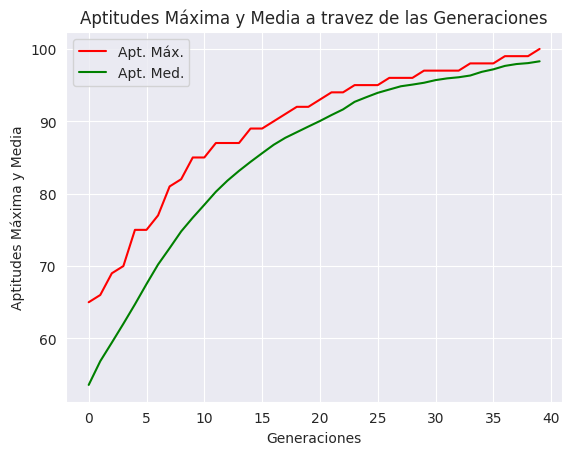

In [34]:
sns.set_style('darkgrid')
plt.plot(Aps_max, color='r', label='Apt. Máx.')
plt.plot(Aps_med, 'g', label='Apt. Med.')
plt.xlabel('Generaciones')
plt.ylabel('Aptitudes Máxima y Media')
plt.title('Aptitudes Máxima y Media a travez de las Generaciones')
plt.legend()
plt.show()

#Uso de Algoritmos integrados

La libreria DEAP viene con varios algoritmos evolutivos integrados en el módulo *algorithms*. Uno de ellos es el implementado anteriormente, *eaSimple*. Además, complementa la ejecución del código con las clases *Statistics* y *Logbook*.

A continuación se muestra la implementacion con dicho módulo para el problema OneMax.

##Importar Librerias

In [35]:
#Libreria DEAP
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

#Aleatorios y arrays
from random import randint, seed, random
import numpy as np

#Graficas
import matplotlib.pyplot as plt
import seaborn as sns

La configuracion del AG es identica a la ya utilizada, por lo cual se obviará para mejor lectura de este notebook.

##Inicio del algoritmo con el AG implementado por DEAP

In [36]:
seed(42)
Poblacion = tl.Generar_poblacion(Tam_Pob)

In [37]:
estadisticas = tools.Statistics(lambda ind: ind.fitness.values)
estadisticas.register('max', np.max)
estadisticas.register('med', np.mean)

El mayor inconveniente que me tope con esta implmentación es que si o si debemos de nombrar los operadores en ingles, es decir, nombrarlos *evaluate*, *select*, *mate*, *mutate*.

In [38]:
tl.register("evaluate", F)
tl.register('select', tools.selTournament, tournsize = 3)
tl.register("mate", tools.cxOnePoint)
tl.register('mutate', tools.mutFlipBit, indpb = 1/Long_str)

In [39]:
Poblacion, logbook = algorithms.eaSimple(Poblacion, tl, cxpb=p_cruza, mutpb=p_mut, ngen=max_gen, stats=estadisticas, verbose=True)

gen	nevals	max	med   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

Cuando el algoritmo genetico simple se ha ejecutado, este regresa dos objetos: la población final y el *logbook*.
El *logbook* contiene todos los estadísticos recolectados de la ejecución del algoritmo.

Ahora, se puede acceder a dichos estadísticos de *logbook* con el método select(). Podiendo manipularlos tal y como se hizo con los datos obtenidos de la otra implementación del algoritmo.

In [40]:
Aptitudes_maximas, Aptitudes_medias = logbook.select('max', 'med')

##Graficas

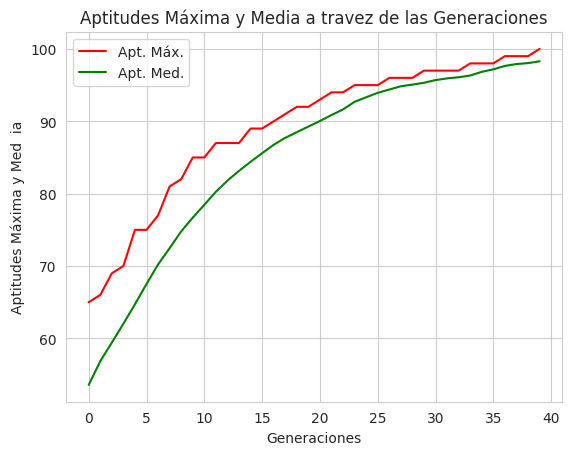

In [41]:
sns.set_style('whitegrid')
plt.plot(Aps_max, color='r', label='Apt. Máx.')
plt.plot(Aps_med, 'g', label='Apt. Med.')
plt.xlabel('Generaciones')
plt.ylabel('Aptitudes Máxima y Med  ia')
plt.title('Aptitudes Máxima y Media a travez de las Generaciones')
plt.legend()
plt.show()

##Comparaciones

Los resultados de esta implementación son casi idénticos que la implementación propia del autos del libro (y que yo he recreado a mi manera). Sin embargo se muestran dos diferencias:
* La implmentación de DEAP muestra información de la generación 0, de la población inicial. Mientras que la implementación del libro no. aunqeu esto se podría solucionar con un par más de lineas, en notable como por defecto DEAP tiene integrada esta pequeña característica.
* La ejecución de la implementación del algortimo de DEAP no termina en la generación 40, sino que completa las 50 generaciones y es allí donde se detiene. Esto se debe a las condiciones de paro de cada una de las implementaciones. en lo personal, me parece que la implementación de DEAP es más acertada en estop, ya que como se nos hizo notar en el libro, no se conoce la solución óptima en todos los probleas, en especial en los de la vida real.

#Implementación del *HallOfFame*

Una de las características que más me llamaron en su momento cuando conocí por primera ver la librería DEAP fue el *Hall of Fame* o "salón de la fama". El cual es una habitación donde se enceuentran almacenados los datos de aquellos individuos más importantes para la sociedad que los rodeaba.

Ya en un lengiaje más formal, el *hall of fame* o *hof* es un objeto donde se almacenan los individuos con mejores puntuaciones de aptitud que exitieron (o existen) a lo largo de la evolución de la población, a lo largo de la ejecución del algortimo.

Para mostrar su funcionamiento se usará la ultima implemntación. Para lo cual nuevamente solo se presentarán las modificaciones de código necesarias. Se puede observar la impementación completa en el repositorio de Github del libro [*Hands On Geneticc Algorithms with Python*](https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python-Second-Edition/tree/main).

In [42]:
hof_size = 10

In [43]:
seed(42)
Poblacion = tl.Generar_poblacion(Tam_Pob)

In [44]:
hof = tools.HallOfFame(hof_size)
Poblacion, logbook = algorithms.eaSimple(Poblacion, tl, cxpb=p_cruza, mutpb=p_mut, ngen=max_gen, stats=estadisticas, halloffame=hof, verbose=True)

gen	nevals	max	med   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

In [45]:
print('Individuos del Hall of Fame:', *hof.items, sep='\n')
print('Mejor Individuo:', hof.items[0])

Individuos del Hall of Fame:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [46]:
Aptitudes_maximas, Aptitudes_medias = logbook.select('max', 'med')

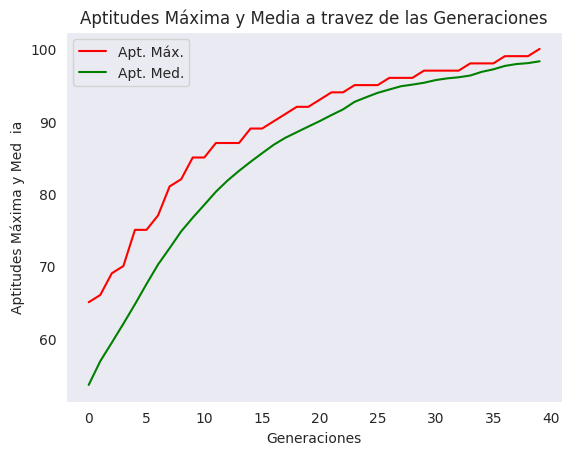

In [47]:
sns.set_style('dark')
plt.plot(Aps_max, color='r', label='Apt. Máx.')
plt.plot(Aps_med, 'g', label='Apt. Med.')
plt.xlabel('Generaciones')
plt.ylabel('Aptitudes Máxima y Med  ia')
plt.title('Aptitudes Máxima y Media a travez de las Generaciones')
plt.legend()
plt.show()